In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv('/content/drive/MyDrive/IMDB-Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [4]:
df.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [5]:
#suffling the date sets
df=df.sample(frac=1, random_state=42)
df.head()

,review,sentiment
33553,I really liked this Summerslam due to the look...,positive
9427,Not many television shows appeal to quite as m...,positive
199,The film quickly gets to a major chase scene w...,negative
12447,Jane Austen would definitely approve of this o...,positive
39489,Expectations were somewhat high for me when I ...,negative


In [6]:
#viewing some random data
import random
random_index=random.randint(0,len(df)-5)

for row in df[['review','sentiment']][random_index:random_index+5].itertuples():
  _,review,sentiment=row
  print(f'sentiment:{sentiment}')
  print(f'review:\n{review}\n')
  print("---\n")

sentiment:negative
review:
Complete waste of time.... This movie is not comedy, it's not drama, it's not romance...not even teenage comedy at least!!! Story... it should be some turn-over one end... but it's so disappointing! When movie has a turn-over on end I expect that turn-over to make movie even better (exp. "Fight Club") but this turn-over makes movie even worse.... When I watch teenage comedy, and I don't do that very often, I expect lousy jokes and bunch of nudeness... Jokes are too lousy and there is no nudity... You got only one....very good looking I must admit... girl, and that's that! And she's fully dressed whole movie! Acting is bad... like soap series... Don't waste your time! There are porns with better story and acting!<br /><br />(sorry on my bad English)

---

sentiment:positive
review:
Perhaps Disney was hoping for another Mary Poppins but this is a very different story and while Angela is delightful she was a very different performer to the great Julie Andrews. H

In [7]:
#replacing the sentiment of positive and negative with 0 and 1
df['sentiment'].replace('positive',1,inplace=True)
df['sentiment'].replace('negative',0,inplace=True)
df.head()

,review,sentiment
33553,I really liked this Summerslam due to the look...,1
9427,Not many television shows appeal to quite as m...,1
199,The film quickly gets to a major chase scene w...,0
12447,Jane Austen would definitely approve of this o...,1
39489,Expectations were somewhat high for me when I ...,0


In [8]:
df.review[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [9]:
#defining a function to remove the special charcters
import re
def sep_remov(text):
  clean=re.compile(r'<.*?>')
  return re.sub(clean,'',text)

In [10]:
#Cleaning the text in the review column
df["review"] = df["review"].apply(sep_remov)
df["review"][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows wo

In [11]:
#Defining a function to filter the special characters
def sep_char(text):
  temp=''
  for i in text:
    if i.isalnum():
      temp=temp+i

    else:
      temp=temp+' '
  return temp

In [12]:
df["review"] = df["review"].apply(sep_char)
df["review"][0]

'One of the other reviewers has mentioned that after watching just 1 Oz episode you ll be hooked  They are right  as this is exactly what happened with me The first thing that struck me about Oz was its brutality and unflinching scenes of violence  which set in right from the word GO  Trust me  this is not a show for the faint hearted or timid  This show pulls no punches with regards to drugs  sex or violence  Its is hardcore  in the classic use of the word It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary  It focuses mainly on Emerald City  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda  Em City is home to many  Aryans  Muslims  gangstas  Latinos  Christians  Italians  Irish and more    so scuffles  death stares  dodgy dealings and shady agreements are never far away I would say the main appeal of the show is due to the fact that it goes where other shows wo

In [13]:
#Defining a function to return the text in lower case
def to_lower(text):
    return text.lower()

In [14]:
df["review"] = df["review"].apply(to_lower)
df["review"][0]

'one of the other reviewers has mentioned that after watching just 1 oz episode you ll be hooked  they are right  as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence  which set in right from the word go  trust me  this is not a show for the faint hearted or timid  this show pulls no punches with regards to drugs  sex or violence  its is hardcore  in the classic use of the word it is called oz as that is the nickname given to the oswald maximum security state penitentary  it focuses mainly on emerald city  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda  em city is home to many  aryans  muslims  gangstas  latinos  christians  italians  irish and more    so scuffles  death stares  dodgy dealings and shady agreements are never far away i would say the main appeal of the show is due to the fact that it goes where other shows wo

In [15]:
df.head(10)

,review,sentiment
33553,i really liked this summerslam due to the look...,1
9427,not many television shows appeal to quite as m...,1
199,the film quickly gets to a major chase scene w...,0
12447,jane austen would definitely approve of this o...,1
39489,expectations were somewhat high for me when i ...,0
42724,i ve watched this movie on a fairly regular ba...,1
10822,for once a story of hope highlighted over the ...,1
49498,okay i didn t get the purgatory thing the fir...,1
4144,i was very disappointed with this series it h...,0
36958,the first 30 minutes of tinseltown had my fing...,0


# preprocessing the Data

In [16]:
#Importing NLTK library
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [17]:
#defining a fuction to remove the stop words
def stop_words_remv(text):
  stop_words=set(stopwords.words('english'))
  words=word_tokenize(text)
  return[w for w in words if w not in stop_words]


In [18]:
df["review"] = df["review"].apply(stop_words_remv)
df["review"][0]

['one',
 'reviewers',
 'mentioned',
 'watching',
 '1',
 'oz',
 'episode',
 'hooked',
 'right',
 'exactly',
 'happened',
 'first',
 'thing',
 'struck',
 'oz',
 'brutality',
 'unflinching',
 'scenes',
 'violence',
 'set',
 'right',
 'word',
 'go',
 'trust',
 'show',
 'faint',
 'hearted',
 'timid',
 'show',
 'pulls',
 'punches',
 'regards',
 'drugs',
 'sex',
 'violence',
 'hardcore',
 'classic',
 'use',
 'word',
 'called',
 'oz',
 'nickname',
 'given',
 'oswald',
 'maximum',
 'security',
 'state',
 'penitentary',
 'focuses',
 'mainly',
 'emerald',
 'city',
 'experimental',
 'section',
 'prison',
 'cells',
 'glass',
 'fronts',
 'face',
 'inwards',
 'privacy',
 'high',
 'agenda',
 'em',
 'city',
 'home',
 'many',
 'aryans',
 'muslims',
 'gangstas',
 'latinos',
 'christians',
 'italians',
 'irish',
 'scuffles',
 'death',
 'stares',
 'dodgy',
 'dealings',
 'shady',
 'agreements',
 'never',
 'far',
 'away',
 'would',
 'say',
 'main',
 'appeal',
 'show',
 'due',
 'fact',
 'goes',
 'shows',
 'da

In [19]:
#stemming the text with nltk
def text_stem(text):
  snow_ball=SnowballStemmer('english')  # we are using the snowball stemmer here
  return" ".join([snow_ball.stem(w) for w in text])

In [20]:
df["review"] = df["review"].apply(text_stem)
df["review"][0]

'one review mention watch 1 oz episod hook right exact happen first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word call oz nicknam given oswald maximum secur state penitentari focus main emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that get touch darker side'

## spliting data into train and validation sets

In [21]:
from  sklearn.model_selection import train_test_split
train_sentences,val_sentences,train_labels,val_labels=train_test_split(df['review'].to_numpy(),
                                                                       df['sentiment'].to_numpy(),
                                                                       test_size=0.1)

In [22]:
len(train_sentences),len(val_sentences),len(train_labels),len(val_labels)

(45000, 5000, 45000, 5000)

In [23]:
# View the first 5 training sentences and their labels
train_sentences[:5], train_labels[:5]

(array(['time movi myopic desir present particular end viewpoint simpli bother actual stori annoy type movi end viewpoint conceiv first stori simpli tack reason often talk stori jump hoop twist tri vain progress preordain end logic fashion stori comet broadway jump hoop three ring circus ludicr ill conceiv disingenu prone speak aloud screen carri quit rant central theme screenplay cesspool woman choos famili profess sinc horribl muddl end offens peopl either opinion end point stori theme becom irrelev often case poor screenplay act save thing',
        'ok movi could soooo good generat expos thunderbird come love film featur one would look good thunderbird movi craft tracey island realist transfer big screen whilst still keep design fell love sophia mile simpli fantast ladi p bill paxton whilst exact envisag jeff tracey solid enough adult taken equat ask believ 8 year old could fli 200 tonn machin much fact movi centr around children made feel like jonathon frake slap wet fish laugh ha

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.pipeline import Pipeline

In [25]:
model_0=Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('clf',MultinomialNB())
])

In [26]:
model_0.fit(train_sentences,train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [27]:
model_0_score=model_0.score(val_sentences,val_labels)

In [28]:
print(f'our  model_0 achives a score of:{model_0_score*100:.2f}%')

our  model_0 achives a score of:86.94%


In [29]:
model_0_preds=model_0.predict(val_sentences)
model_0_preds[:20]

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [30]:
from sklearn.metrics import accuracy_score,precision_recall_fscore_support

def calculate_results(y_true,y_pred):
  model_accuracy=accuracy_score(y_true,y_pred)
  model_precision,model_recall,model_f1,_=precision_recall_fscore_support(y_true,y_pred,average='weighted')
  model_results={'accuracy': model_accuracy,
                 'precison': model_precision,
                 'recall': model_recall,
                 'f1 score':model_f1}

  return model_results

In [31]:
model_0_results=calculate_results(y_true=val_labels,y_pred=model_0_preds)
model_0_results

{'accuracy': 0.8694,
 'precison': 0.8697076376427871,
 'recall': 0.8694,
 'f1 score': 0.8693683390595114}

In [32]:
model_1=Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('clf',BernoulliNB())
])

In [33]:
model_1.fit(train_sentences,train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', BernoulliNB())])

In [34]:
model_1_score=model_1.score(val_sentences,val_labels)
print(f'our model_1 achives a score of:{model_1_score*100:.2f}%')

our model_1 achives a score of:85.36%


In [35]:
model_1_preds=model_1.predict(val_sentences)
model_1_results=calculate_results(y_true=val_labels,y_pred=model_1_preds)
model_1_results

{'accuracy': 0.8536,
 'precison': 0.8547932275811323,
 'recall': 0.8536,
 'f1 score': 0.853466493783709}

# Building a Neural network model.

In [36]:
import tensorflow as tf 
import numpy as np
import pandas as pd
from tensorflow.keras import layers
import matplotlib.pyplot as plt


In [37]:
sent_length=[len(sentence.split()) for sentence in train_sentences]


In [38]:
avg_length=np.mean(sent_length)
avg_length

119.8406

(array([2.5300e+04, 1.2926e+04, 4.0270e+03, 1.5990e+03, 7.6300e+02,
        3.3600e+02, 3.2000e+01, 5.0000e+00, 4.0000e+00, 4.0000e+00,
        0.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([   3.        ,   98.06666667,  193.13333333,  288.2       ,
         383.26666667,  478.33333333,  573.4       ,  668.46666667,
         763.53333333,  858.6       ,  953.66666667, 1048.73333333,
        1143.8       , 1238.86666667, 1333.93333333, 1429.        ]),
 <a list of 15 Patch objects>)

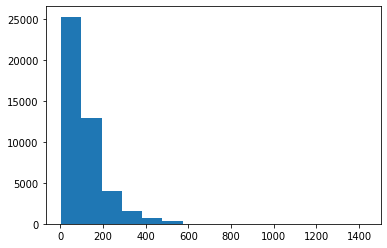

In [39]:
plt.hist(sent_length,bins=15)

In [40]:
output_seq_length=int(np.percentile(sent_length,90))
output_seq_length

236

In [41]:
max_vocab_length=10000
from tensorflow.keras.layers import TextVectorization
text_vectorizer=TextVectorization(max_tokens=max_vocab_length,
                               output_sequence_length=200)

In [42]:
# Adapt text vectorizer to training sentences
text_vectorizer.adapt(train_sentences)

In [43]:
import random
random_sentence=random.choice(train_sentences)
print(f'text:\n {random_sentence}')
print(f'\n length of sentence : {len(random_sentence.split())}')
print(f"\nVectorized text:\n{text_vectorizer([random_sentence])}")

text:
 whatev name writer director lock away hope garbag like never made one battl aw movi time sometim movi bad way actual sort good one bad got angri serious drunken 10 year old could come better script wast actor complet uninspir work cgi bare accept sequenc scene complet retard hurt littl bit stori like decid want happen happen care got shoot put whatev go back trailer pick nose anyon call shame whatev name shame

 length of sentence : 73

Vectorized text:
[[ 789  154  319   66 1594  170  194 1077    5   50   35    4  687  300
     2    6  450    2   21   33   67  329    7    4   21  108 1452  257
  3150   82   46   73   36   47   57  126  239   43  143 2448   40 1428
   853  708  352   18  143 2161 1025   54  122   14    5  312   49  109
   109  255  108  487  136  789   27   68 1139  494 2136  177  160  741
   789  154  741    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0

In [44]:
#how many words in our training voccablulary
movie_text_vocab = text_vectorizer.get_vocabulary()
print(f"Number of words in vocabulary: {len(movie_text_vocab)}"), 
print(f"Most common words in the vocabulary: {movie_text_vocab[:10]}")
print(f"Least common words in the vocabulary: {movie_text_vocab[-10:]}")

Number of words in vocabulary: 10000
Most common words in the vocabulary: ['', '[UNK]', 'movi', 'film', 'one', 'like', 'time', 'good', 'make', 'charact']
Least common words in the vocabulary: ['throttl', 'thinn', 'tentacl', 'systemat', 'symptom', 'swordplay', 'swoon', 'substandard', 'subgenr', 'strait']


In [45]:
# creating a coustom text embedding
token_embedding=layers.Embedding(input_dim=10000,
                                 output_dim=128,
                                 mask_zero=True,
                                 name='token_embedding')

In [46]:
embeded_sentence=token_embedding(text_vectorizer([random_sentence]))
print(f'random_sentence:{random_sentence}\n \n embedded sentence:{embeded_sentence}')

random_sentence:whatev name writer director lock away hope garbag like never made one battl aw movi time sometim movi bad way actual sort good one bad got angri serious drunken 10 year old could come better script wast actor complet uninspir work cgi bare accept sequenc scene complet retard hurt littl bit stori like decid want happen happen care got shoot put whatev go back trailer pick nose anyon call shame whatev name shame
 
 embedded sentence:[[[-0.04990063 -0.01888411  0.04014531 ...  0.03562078 -0.00422053
    0.01749948]
  [-0.00363439  0.04415765 -0.01059822 ... -0.03238837  0.04536425
    0.02760604]
  [-0.0474047   0.00882317 -0.02371044 ...  0.03954974 -0.01645615
    0.04343906]
  ...
  [ 0.04876662  0.00093477 -0.02031181 ...  0.00627594  0.00466474
    0.00285133]
  [ 0.04876662  0.00093477 -0.02031181 ...  0.00627594  0.00466474
    0.00285133]
  [ 0.04876662  0.00093477 -0.02031181 ...  0.00627594  0.00466474
    0.00285133]]]


#Conv1D model

In [47]:
inputs=layers.Input(shape=(1,),dtype=tf.string)
text_vectors=text_vectorizer(inputs)
token_embeddings=token_embedding(text_vectors)
x=layers.Conv1D(64,kernel_size=5,padding='same',activation='relu')(token_embeddings)
x=layers.Conv1D(64,kernel_size=5,padding='same',activation='relu')(x)
x=layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model_2=tf.keras.Model(inputs,outputs)

#compiling
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [48]:
model_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 200)              0         
 torization)                                                     
                                                                 
 token_embedding (Embedding)  (None, 200, 128)         1280000   
                                                                 
 conv1d (Conv1D)             (None, 200, 64)           41024     
                                                                 
 conv1d_1 (Conv1D)           (None, 200, 64)           20544     
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                              

In [49]:
# Fit the model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=3,
                              validation_data=(val_sentences, val_labels))

Epoch 1/3
1407/1407 [==============================] - 18s 7ms/step - loss: 0.3498 - accuracy: 0.8391 - val_loss: 0.2708 - val_accuracy: 0.8830
Epoch 2/3
1407/1407 [==============================] - 9s 7ms/step - loss: 0.1961 - accuracy: 0.9229 - val_loss: 0.2845 - val_accuracy: 0.8842
Epoch 3/3
1407/1407 [==============================] - 9s 7ms/step - loss: 0.0935 - accuracy: 0.9673 - val_loss: 0.3296 - val_accuracy: 0.8904


In [50]:
model_2_pred_probs = model_2.predict(val_sentences)

157/157 [==============================] - 1s 3ms/step


In [51]:
model_2_preds=tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 1., 0., 0., 1., 1., 0., 1., 1.], dtype=float32)>

In [52]:
# Calculate model results
model_2_results = calculate_results(val_labels, model_2_preds)
model_2_results

{'accuracy': 0.8904,
 'precison': 0.8908987874490766,
 'recall': 0.8904,
 'f1 score': 0.8903605282112845}

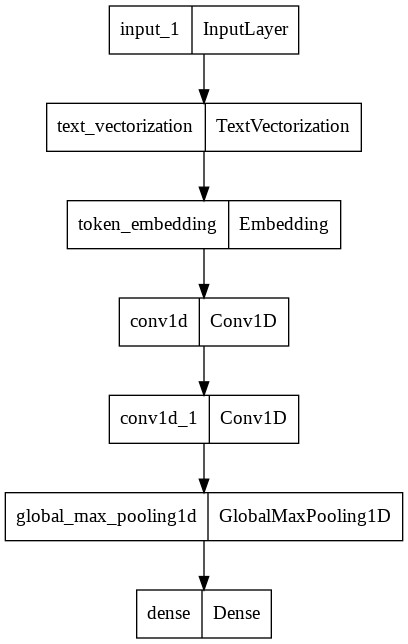

In [53]:
from tensorflow.keras.utils import plot_model
plot_model(model_2)

# comparing all 3 model results

In [54]:
all_model_results=pd.DataFrame({'MultinomialNB model':model_0_results,
                                'BernoulliNB model':model_1_results,
                                'Conv1D model': model_2_results})

all_model_results=all_model_results.transpose()
all_model_results

,accuracy,precison,recall,f1 score
MultinomialNB model,0.8694,0.869708,0.8694,0.869368
BernoulliNB model,0.8536,0.854793,0.8536,0.853466
Conv1D model,0.8904,0.890899,0.8904,0.890361


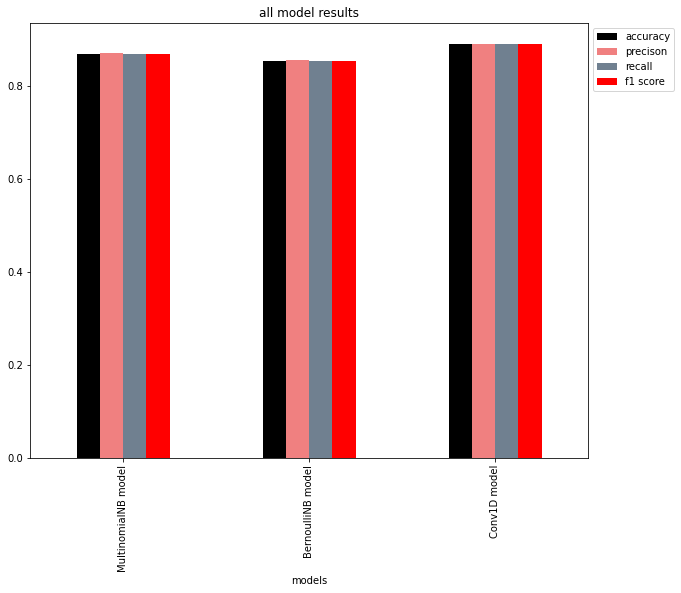

In [55]:
all_model_results.plot(kind='bar',xlabel='models',title='all model results',figsize=(10,8),color=['black','lightcoral','slategray','red']).legend(bbox_to_anchor=(1.0, 1.0));

In [59]:
#Testing the performance of the model
rev =  """Terrible. Complete trash. Brainless tripe. Insulting to anyone who isn't an 8 year old fan boy. Im actually pretty disgusted that this movie is making the money it is - what does it say about the people who brainlessly hand over the hard earned cash to be 'entertained' in this fashion and then come here to leave a positive 8.8 review?? Oh yes, they are morons. Its the only sensible conclusion to draw. How anyone can rate this movie amongst the pantheon of great titles is beyond me.
So trying to find something constructive to say about this title is hard...I enjoyed Iron Man? Tony Stark is an inspirational character in his own movies but here he is a pale shadow of that...About the only 'hook' this movie had into me was wondering when and if Iron Man would knock Captain America out...Oh how I wished he had :( What were these other characters anyways? Useless, bickering idiots who really couldn't organise happy times in a brewery. The film was a chaotic mish mash of action elements and failed 'set pieces'...
I found the villain to be quite amusing.And now I give up. This movie is no"""

In [67]:
f1 = sep_remov(rev)
f2 = sep_char(f1)
f3 = to_lower(f2)
f4 = stop_words_remv(f3)
f5 = text_stem(f4)

bow,words = [],word_tokenize(f5)
for word in words:
    bow.append(words.count(word))